In [1]:
print('Hello')

Hello


In [1]:
!nvidia-smi

Sat Dec 14 20:54:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

0.26.5
Using device: cuda
Attempting to load: stabilityai/stable-diffusion-3.5-large
Checking access for repository: stabilityai/stable-diffusion-3.5-large
Files in repository:
- .gitattributes
- LICENSE.md
- README.md
- SD3.5L_example_workflow.json
- mmdit.png
- model_index.json
- scheduler/scheduler_config.json
- sd3.5_large.safetensors
- sd3.5_large_demo.png
- text_encoder/config.json
- text_encoder/model.fp16.safetensors
- text_encoder/model.safetensors
- text_encoder_2/config.json
- text_encoder_2/model.fp16.safetensors
- text_encoder_2/model.safetensors
- text_encoder_3/config.json
- text_encoder_3/model-00001-of-00002.safetensors
- text_encoder_3/model-00002-of-00002.safetensors
- text_encoder_3/model.fp16-00001-of-00002.safetensors
- text_encoder_3/model.fp16-00002-of-00002.safetensors
- text_encoder_3/model.safetensors.index.fp16.json
- text_encoder_3/model.safetensors.index.json
- text_encoders/README.md
- text_encoders/clip_g.safetensors
- text_encoders/clip_l.safetensors
- 

Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-675df9a1-3f1407f2670b5d291d0ba9c1;ab42f7c7-9b29-449d-8496-e684cd029184)

Revision Not Found for url: https://huggingface.co/api/models/stabilityai/stable-diffusion-3.5-large/revision/fp16.
Invalid rev id: fp16.
Will try to load from local cache.
Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-675df9a1-3033dbc46a71372558497ee1;1844439c-ef36-44ac-b492-1d5f78dbdc88)

Revision Not Found for url: https://huggingface.co/api/models/stabilityai/stable-diffusion-xl-base-1.0/revision/fp16.
Invalid rev id: fp16.
Will try to load from local cache.


Failed to load model stabilityai/stable-diffusion-3.5-large. Error: Cannot load model stabilityai/stable-diffusion-3.5-large: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.
Attempting to load: stabilityai/stable-diffusion-xl-base-1.0
Checking access for repository: stabilityai/stable-diffusion-xl-base-1.0
Files in repository:
- .gitattributes
- 01.png
- LICENSE.md
- README.md
- comparison.png
- model_index.json
- pipeline.png
- scheduler/scheduler_config.json
- sd_xl_base_1.0.safetensors
- sd_xl_base_1.0_0.9vae.safetensors
- sd_xl_offset_example-lora_1.0.safetensors
- text_encoder/config.json
- text_encoder/flax_model.msgpack
- text_encoder/model.fp16.safetensors
- text_encoder/model.onnx
- text_encoder/model.safetensors
- text_encoder/openvino_model.bin
- text_encoder/openvino_model.xml
- text_encoder_2/config.json
- text_encoder_2/flax_model.msgpack
- text_encoder_2/model.fp16.saf

model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Model stabilityai/stable-diffusion-2-1 loaded successfully.
Generating an image with the prompt...


  0%|          | 0/25 [00:00<?, ?it/s]

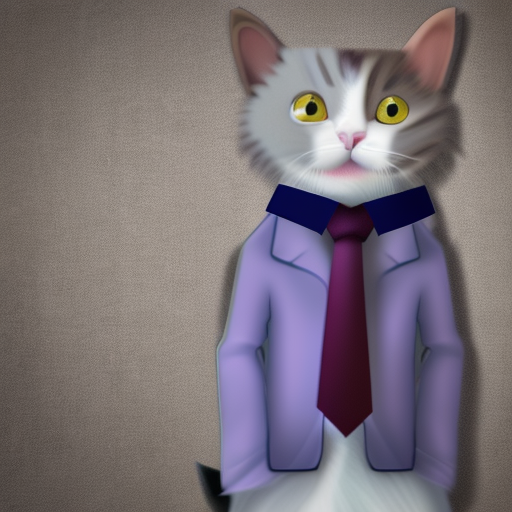

Image generated and displayed successfully!


In [ ]:
# Updated Stable Diffusion Setup

# Install necessary libraries and dependencies
!pip install huggingface-hub --upgrade

import huggingface_hub
print(huggingface_hub.__version__)

!pip install diffusers transformers accelerate torch torchvision huggingface-hub --upgrade

# Import required libraries
from diffusers import StableDiffusionPipeline
from huggingface_hub import login
import torch
from PIL import Image
from IPython.display import display

# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Authenticate with Hugging Face
HUGGINGFACE_TOKEN = "YOUR-API-KEY"  # Replace with your token
login(HUGGINGFACE_TOKEN)

# Function to verify access and list repository files
from huggingface_hub import HfApi

# Function to verify access and list repository files
def check_model_access(repo_id):
    """Verify model access and list files in a repository."""
    api = HfApi()
    try:
        print(f"Checking access for repository: {repo_id}")
        files = api.list_repo_files(repo_id=repo_id)  # Alternative to hf_hub_list
        print("Files in repository:")
        for file in files:
            print(f"- {file}")
        return True
    except Exception as e:
        print(f"Access check failed for {repo_id}: {e}")
        return False

# Function to load Stable Diffusion model with fallback
def load_model():
    """Load a Stable Diffusion model with fallbacks."""
    model_list = [
        "stabilityai/stable-diffusion-3.5-large",  # Target model
        "stabilityai/stable-diffusion-xl-base-1.0",  # Fallback model
        "stabilityai/stable-diffusion-2-1"  # Older stable version
    ]
    for model_name in model_list:
        print(f"Attempting to load: {model_name}")
        if check_model_access(model_name):  # Check if the repository is accessible
            try:
                pipeline = StableDiffusionPipeline.from_pretrained(
                    model_name,
                    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
                    revision="fp16" if device == "cuda" else None,
                    force_download=True
                )
                pipeline.to(device)
                print(f"Model {model_name} loaded successfully.")
                return pipeline
            except Exception as e:
                print(f"Failed to load model {model_name}. Error: {e}")
    raise ValueError("Could not load any Stable Diffusion model. Please check your access and tokens.")

# Load the model
try:
    sd_pipeline = load_model()
except ValueError as e:
    print(e)
    exit()

# Text-to-Image generation example
prompt = "A cat with a tie and coat"
try:
    print("Generating an image with the prompt...")
    image = sd_pipeline(
        prompt=prompt,
        negative_prompt="",
        num_inference_steps=25,
        height=512,
        width=512,
        guidance_scale=7.5
    ).images[0]

    # Display the image
    display(image)
    print("Image generated and displayed successfully!")
except Exception as e:
    print(f"Image generation failed. Error: {e}")


Using device: cuda


Keyword arguments {'quantization_config': BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "bfloat16",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant": false,
  "llm_int8_enable_fp32_cpu_offload": false,
  "llm_int8_has_fp16_weight": false,
  "llm_int8_skip_modules": null,
  "llm_int8_threshold": 6.0,
  "load_in_4bit": true,
  "load_in_8bit": false,
  "quant_method": "bitsandbytes"
}
} are not expected by StableDiffusion3Pipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/10 [00:00<?, ?it/s]

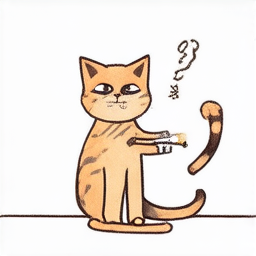

In [1]:
# Install and update necessary libraries
!pip install -U diffusers transformers accelerate torch torchvision bitsandbytes huggingface-hub

# Fix memory fragmentation before importing torch
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Import required libraries
import torch
from diffusers import StableDiffusion3Pipeline, BitsAndBytesConfig
from IPython.display import display

# Clear GPU memory cache before proceeding
torch.cuda.empty_cache()

# Check GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Enable 4-bit quantization to save memory
nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# Load Stable Diffusion 3.5 Medium with balanced device_map and quantization
model_id = "stabilityai/stable-diffusion-3.5-medium"

pipeline = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    quantization_config=nf4_config,
    device_map="balanced"  # Use balanced strategy for layer distribution
)

# Define the prompt
prompt = "Cat with a cigarette in left hand"

# Reduce inference steps and image size to save memory
with torch.no_grad():
    image = pipeline(
        prompt=prompt,
        num_inference_steps=10,  # Further reduce inference steps
        guidance_scale=4.0,      # Adjust guidance scale for balance
        height=256,              # Lower the height
        width=256                # Lower the width
    ).images[0]

display(image)

# Save and display the image
# image.save("optimized_balanced_waffle_hippo.png")
# image.show()
